In [1]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, gradient_boosting
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [2]:
df=pd.read_csv('space_server.csv')

In [3]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [4]:
df.shape

(10000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [8]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [9]:
df.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


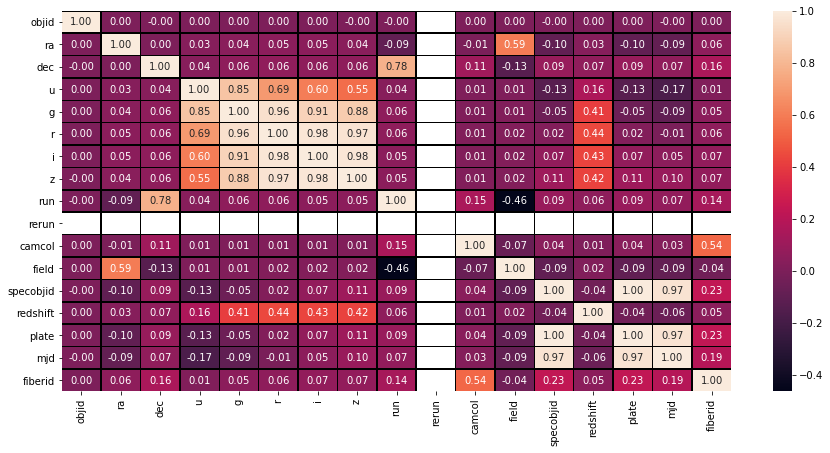

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor='black',fmt='.2f')

In [11]:
df.drop(columns=['objid','rerun','specobjid'], inplace= True)

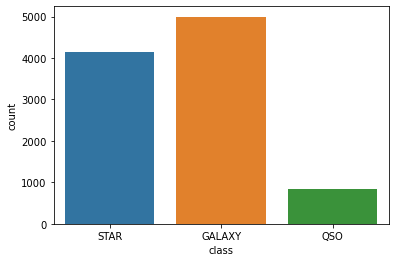

In [12]:
sns.countplot(df['class'])

In [15]:
le= LabelEncoder()
df['class']=le.fit_transform(df['class'])

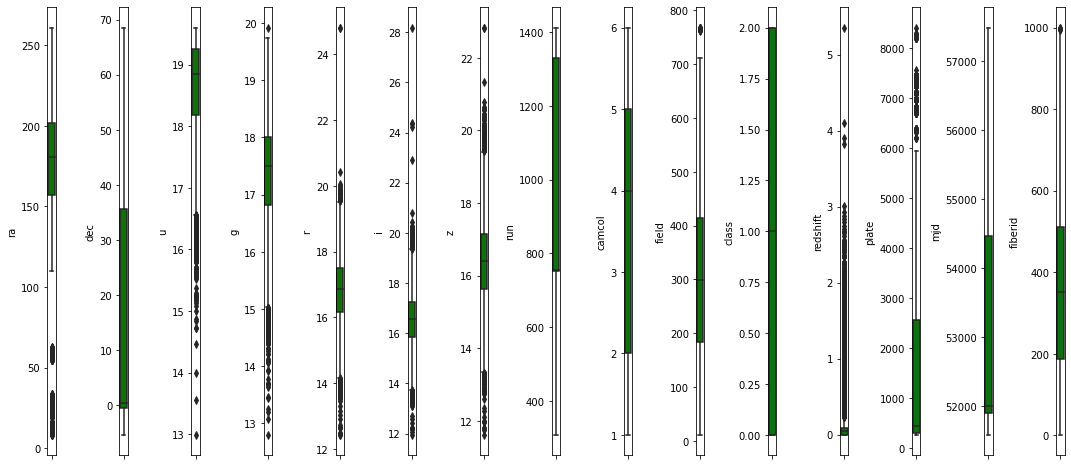

In [16]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

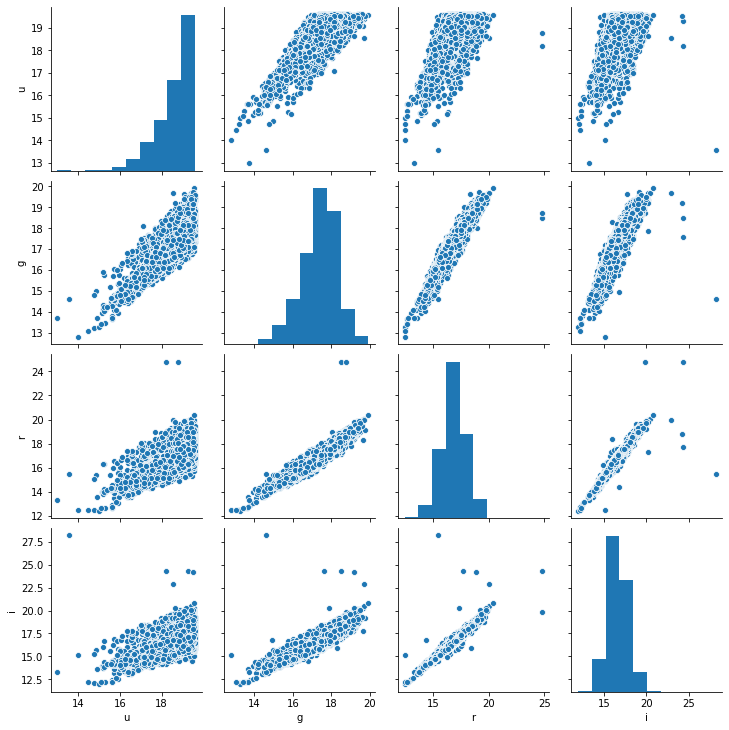

In [17]:
sns.pairplot(df[['u','g','r','i']])

In [20]:
X=df.drop('class',axis=1)
Y=df['class']

In [21]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)
  
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

[1]K Nearest Neighbor Training Accuracy: 0.822375
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.824625
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.79525
[4]Gaussian Naive Bayes Training Accuracy: 0.853875
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.998875


In [23]:
import pickle 
filename = 'project8_spaceserver.pkl'
pickle.dump(tree,open(filename, 'wb'))

In [24]:
import numpy as np
a=np.array(Y_test)
predicted=np.array(tree.predict(X_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,2,2
...,...,...
1995,2,2
1996,0,0
1997,1,1
1998,0,0
